In [7]:
import pandas as pd

data = pd.read_csv("/content/sample_data/Students_Social_Media_Addiction.csv")
data.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [8]:
data.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [10]:
data.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [11]:
correlation=data["Avg_Daily_Usage_Hours"].corr(data["Addicted_Score"])
print("Correlation between avgerage daily user hours and Addicted Score:",correlation)

Correlation between avgerage daily user hours and Addicted Score: 0.8320001573523091


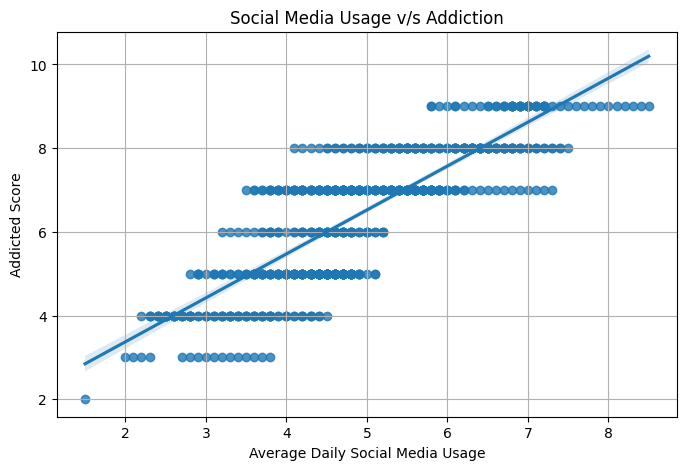

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.regplot(x="Avg_Daily_Usage_Hours",y="Addicted_Score",data=data)
plt.title("Social Media Usage v/s Addiction")
plt.xlabel("Average Daily Social Media Usage")
plt.ylabel("Addicted Score")
plt.grid(True)
plt.show()

In [13]:
sleep_corr = data["Avg_Daily_Usage_Hours"].corr(data["Sleep_Hours_Per_Night"])
print("Correlation between Usage Hours and Sleep Hours:", sleep_corr)

Correlation between Usage Hours and Sleep Hours: -0.7905824554799917


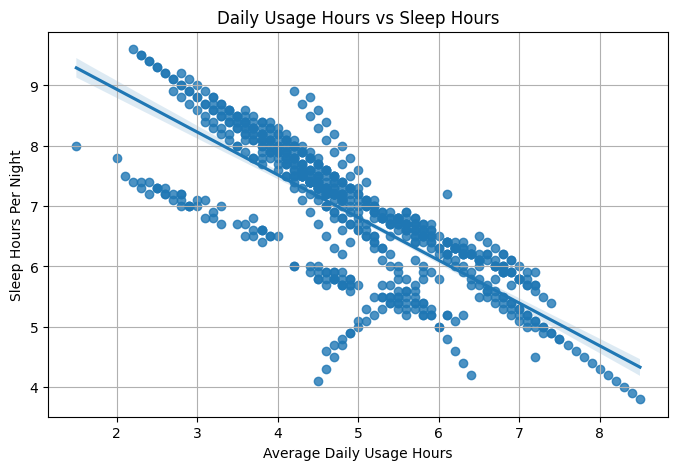

In [14]:
plt.figure(figsize=(8,5))

sns.regplot(
    x="Avg_Daily_Usage_Hours",
    y="Sleep_Hours_Per_Night",
    data=data
)

plt.title("Daily Usage Hours vs Sleep Hours")
plt.xlabel("Average Daily Usage Hours")
plt.ylabel("Sleep Hours Per Night")

plt.grid(True)
plt.show()

In [15]:
mental_corr = data["Addicted_Score"].corr(data["Mental_Health_Score"])
print("Correlation between Addiction Score and Mental Health:", mental_corr)

Correlation between Addiction Score and Mental Health: -0.9450506757277399


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data[["Avg_Daily_Usage_Hours"]]
y = data["Addicted_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

R² Score: 0.6866148701381766


In [17]:
X = data[["Avg_Daily_Usage_Hours",
          "Sleep_Hours_Per_Night",
          "Conflicts_Over_Social_Media"]]

y = data["Addicted_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("New R² Score:", r2)

New R² Score: 0.9130551323988928
